In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import sklearn.preprocessing as skp
from keras.models import Sequential

In [2]:
data = pd.read_csv("BTC-USD.csv")

In [3]:
pd.set_option("display.max.columns", None)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704
1,2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504
2,2015-01-16,209.070007,221.591003,199.770996,208.097000,208.097000,38421000
3,2015-01-17,207.834000,211.731003,194.875000,199.259995,199.259995,23469700
4,2015-01-18,200.050003,218.695007,194.505997,210.339005,210.339005,30085100


In [11]:
plt.rcParams ['figure.figsize'] = [18, 6]


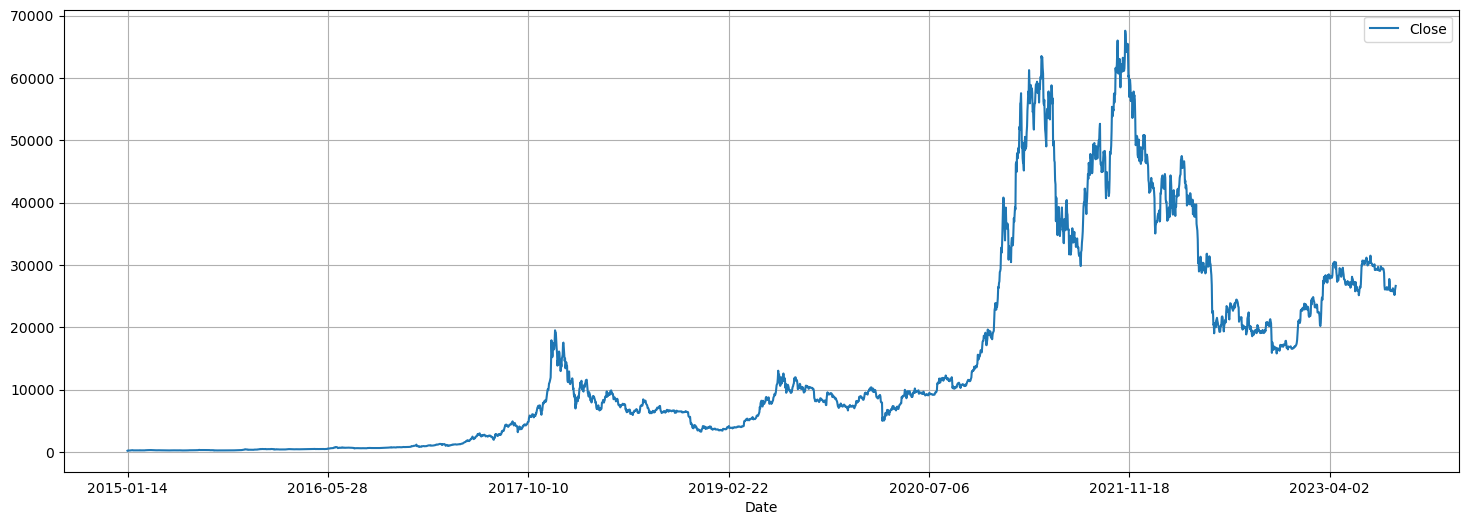

In [10]:
data.plot(x = "Date", y = ["Close"])
plt.grid(True)

In [52]:
df = data.filter(['Close'])
vals = df.values
scaler = skp.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(vals)

In [55]:
train_amount = round(len(df)*0.8)
train_data = scaled[:train_amount]
X_train = []
y_train = []

for i in range(14, len(train_data)):
  X_train.append(train_data[i-14:i, 0])
  y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)    
X_train = np.expand_dims(X_train, 1)

In [61]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1:])),
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(32),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='elu'),
    layers.Dense(1)
    ])
    
model.compile(optimizer='adam', loss='mse')

2023-09-15 21:33:28.939824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-15 21:33:28.940150: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [72]:
model.fit(X_train, y_train, batch_size=128, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 0s 5ms/step - loss: 5.1691e-04
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 5.1624e-04
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 5.1070e-04
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.4256e-04
Epoch 5/1000
20/20 [==============================] - 0s 5ms/step - loss: 5.8803e-04
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 5.9470e-04
Epoch 7/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.9034e-04
Epoch 8/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.4366e-04
Epoch 9/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.4890e-04
Epoch 10/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.9171e-04
Epoch 11/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.7733e-04
Epoch 12/1000
20/20 [==============================] - 0s 5ms/s

In [73]:
test_data = scaled[train_amount - 14: , :]

X_test = []
y_test = vals[train_amount:, :]
for i in range(14, len(test_data)):
    X_test.append(test_data[i-14:i, 0])
    
X_test = np.array(X_test)
X_test = np.expand_dims(X_test, 1)
 
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

20/20 [==============================] - 0s 2ms/step


In [74]:
pred[0:10]

array([[47944.918],
       [49135.605],
       [49309.92 ],
       [51916.703],
       [52903.656],
       [51724.984],
       [52046.582],
       [52552.61 ],
       [49330.32 ],
       [47071.484]], dtype=float32)

In [75]:
y_test[0:10]

array([[48936.613281],
       [48628.511719],
       [50784.539063],
       [50822.195313],
       [50429.859375],
       [50809.515625],
       [50640.417969],
       [47588.855469],
       [46444.710938],
       [47178.125   ]])